In [1]:
import copy
import csv
import numpy as np
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.groupby(['Member_number'],as_index=False).first()

,Member_number,Date,itemDescription
0,1000,27-05-2015,soda
1,1001,20-01-2015,frankfurter
2,1002,26-04-2015,tropical fruit
3,1003,10-02-2015,sausage
4,1004,02-12-2015,other vegetables
...,...,...,...
3893,4996,24-10-2015,dessert
3894,4997,27-12-2015,tropical fruit
3895,4998,14-10-2015,rolls/buns
3896,4999,26-12-2015,bottled water


In [4]:
holder = df['itemDescription']
print(holder[:10])

0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
5          rolls/buns
6    other vegetables
7          pot plants
8          whole milk
9      tropical fruit
Name: itemDescription, dtype: object


In [5]:
print(len(holder))

38765


In [6]:
print(type(holder))

<class 'pandas.core.series.Series'>


In [7]:
holder_1 = holder.drop(0)

In [8]:
holder_1.head()

1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
5          rolls/buns
Name: itemDescription, dtype: object

In [9]:
holder_1

1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
5                   rolls/buns
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38764, dtype: object

In [10]:
holder_list = holder_1.to_list()
print(holder_list[:10])

['whole milk', 'pip fruit', 'other vegetables', 'whole milk', 'rolls/buns', 'other vegetables', 'pot plants', 'whole milk', 'tropical fruit', 'citrus fruit']


In [11]:
print(len(holder_list))

38764


In [12]:
master_list = set()
for i in range(len(holder_list)):
    master_list.add(copy.copy(holder_list[i]))
print(len(master_list))

167


In [16]:
# cloud = WordCloud(width=16000, height=8000).generate(" ".join(holder_list))

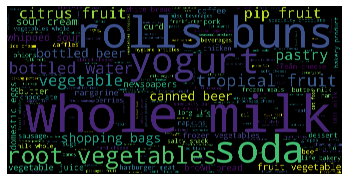

In [17]:
# plt.imshow(cloud, interpolation='bilinear')
# plt.axis("off")
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig('Data/wordcloud.png',dpi=400)

In [18]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [21]:
df1 = df.drop(columns=["Date"])
df1.head()

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk


In [23]:
df1.sort_values(by=['Member_number'], inplace=True)
df1.head()

,Member_number,itemDescription
1629,1000,soda
13331,1000,whole milk
8395,1000,whole milk
4843,1000,sausage
17778,1000,pickled vegetables


In [24]:
df1.tail()

,Member_number,itemDescription
34885,5000,semi-finished bread
25489,5000,other vegetables
9340,5000,bottled beer
27877,5000,onions
3578,5000,soda


In [26]:
df1.reset_index(inplace=True)
df1.head()

,index,Member_number,itemDescription
0,1629,1000,soda
1,13331,1000,whole milk
2,8395,1000,whole milk
3,4843,1000,sausage
4,17778,1000,pickled vegetables


In [27]:
df1.drop(columns=['index'],inplace=True)
df1.head()

,Member_number,itemDescription
0,1000,soda
1,1000,whole milk
2,1000,whole milk
3,1000,sausage
4,1000,pickled vegetables


In [28]:
df1['itemDescription'].isnull().values.any()

False

In [29]:
df1['Member_number'].isnull().values.any()

False

In [32]:
grouped = df1.groupby('Member_number')['itemDescription'].apply(list)

In [33]:
print(grouped)

Member_number
1000    [soda, whole milk, whole milk, sausage, pickle...
1001    [whole milk, sausage, curd, soda, beef, frankf...
1002    [other vegetables, frozen vegetables, specialt...
1003    [rolls/buns, dental care, detergent, sausage, ...
1004    [whole milk, packaged fruit/vegetables, whole ...
                              ...                        
4996    [misc. beverages, dessert, soda, decalcifier, ...
4997    [curd, whole milk, white wine, tropical fruit,...
4998                                   [curd, rolls/buns]
4999    [other vegetables, yogurt, whipped/sour cream,...
5000    [root vegetables, fruit/vegetable juice, semi-...
Name: itemDescription, Length: 3898, dtype: object


In [34]:
print(type(grouped))

<class 'pandas.core.series.Series'>


In [36]:
grouped.describe()

count                3898
unique               3887
top       [sausage, soda]
freq                    3
Name: itemDescription, dtype: object

In [37]:
transactions = grouped.to_list()

In [38]:
print(transactions)

[['soda', 'whole milk', 'whole milk', 'sausage', 'pickled vegetables', 'canned beer', 'yogurt', 'misc. beverages', 'salty snack', 'sausage', 'semi-finished bread', 'hygiene articles', 'pastry'], ['whole milk', 'sausage', 'curd', 'soda', 'beef', 'frankfurter', 'white bread', 'frankfurter', 'whipped/sour cream', 'rolls/buns', 'whole milk', 'soda'], ['other vegetables', 'frozen vegetables', 'specialty chocolate', 'sugar', 'butter', 'whole milk', 'tropical fruit', 'butter milk'], ['rolls/buns', 'dental care', 'detergent', 'sausage', 'rolls/buns', 'rolls/buns', 'frozen meals', 'root vegetables'], ['whole milk', 'packaged fruit/vegetables', 'whole milk', 'canned beer', 'chocolate', 'dish cleaner', 'shopping bags', 'other vegetables', 'pip fruit', 'red/blush wine', 'root vegetables', 'whole milk', 'frozen fish', 'hygiene articles', 'pastry', 'chocolate', 'rolls/buns', 'other vegetables', 'tropical fruit', 'rolls/buns', 'cling film/bags'], ['whipped/sour cream', 'rolls/buns', 'margarine', 'rol

In [39]:
print(len(transactions))

3898


In [41]:
file = open('Data/transaction_data.csv', 'w', newline='')
with file:
    write = csv.writer(file)
    write.writerows(transactions)